# My project : Opportunity to open new restaurant around Kasetsart University Thailand .

Hi everyone, my name is Siravit Khongin from Thailand.  

When i study in Kasetsart University I have seen a lot of restaurant open and close a lot for 4 years , 

Now a lot of them still open but if it already have it a lot, is it still have an opportunity to open new restaurant around university. 

so this is my inspiration in my project "Opportunity to open new restaurant around Kasetsart University Thailand "

### Import Package

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20180916104412-0000
Solving environment: done

## Package Plan ##

  environment location: /opt/ibm/conda/miniconda3

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_0         3.5 MB  conda-forge
    conda-4.5.11               |           py35_0         636 KB  conda-forge
    ca-certificates-2018.8.24  |       ha4d7672_0         136 KB  conda-forge
    certifi-2018.8.24          |           py35_1         138 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.5 MB

The followin

### Set CLIENT_ID

In [99]:
#CLIENT_ID = '' # your Foursquare ID
#CLIENT_SECRET = '' # your Foursquare Secret
#VERSION = '20180604'
#LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)
print('')

### Find address Kasetsart University

In [41]:
address = 'Kasetsart university, thailand'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


13.84835455 100.567569678061


### Find  data  of restaurant around Kasetsart University

#### Find Type of restaurant and radius

In [87]:
thai_query = 'thai'
jap_query = 'japanese'
chinese_query = 'chinese'
italian_query = 'italian'
radius = 800

#### Find URL

In [88]:
thai_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, thai_query, radius, LIMIT)
jap_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, jap_query, radius, LIMIT)
chinese_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, chinese_query, radius, LIMIT)
italian_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, italian_query, radius, LIMIT)

#### Get Data

In [89]:
jap_results = requests.get(jap_url).json()
thai_results = requests.get(thai_url).json()
italian_results = requests.get(italian_url).json()
chinese_results = requests.get(chinese_url).json()

print(jap_results)

{'meta': {'requestId': '5b9e7d07db04f54ad691a877', 'code': 200}, 'response': {'venues': [{'name': 'Higo-Thai Japanese Language Center (ศูนย์ภาษาญี่ปุ่นฮิโกไทย)', 'categories': [{'pluralName': 'College Classrooms', 'name': 'College Classroom', 'id': '4bf58dd8d48988d1a0941735', 'shortName': 'Classroom', 'primary': True, 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/classroom_', 'suffix': '.png'}}], 'hasPerk': False, 'id': '4f1502ece4b03802063fe475', 'location': {'formattedAddress': ['Kasetsart University Laboratory School, Kasetsart University, Lat Yao, Chatuchak, Bangkok 10900', 'ประเทศไทย'], 'cc': 'TH', 'distance': 677, 'country': 'ประเทศไทย', 'lat': 13.854110547853443, 'lng': 100.56553547424092, 'labeledLatLngs': [{'lat': 13.854110547853443, 'lng': 100.56553547424092, 'label': 'display'}], 'address': 'Kasetsart University Laboratory School, Kasetsart University, Lat Yao, Chatuchak, Bangkok 10900'}, 'referralId': 'v-1537113351'}, {'name': 'Japanese Combat Gym', '

### Create Dataframe for each type of restaurant

#### Japan restaurant

In [90]:
jap_venues = jap_results['response']['venues']

jap_dataframe = json_normalize(jap_venues)

jap_filtered_columns = ['name', 'categories'] + [col for col in jap_dataframe.columns if col.startswith('location.')] + ['id']
jap_dataframe_filtered = jap_dataframe.loc[:,jap_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
jap_dataframe_filtered['categories'] = jap_dataframe_filtered.apply(get_category_type, axis=1) 

jap_dataframe_filtered.columns = [column.split('.')[-1] for column in jap_dataframe_filtered.columns]

print(jap_dataframe_filtered['name'].head(3))
jap_dataframe_filtered.head()

0    Higo-Thai Japanese Language Center (ศูนย์ภาษาญ...
1                                  Japanese Combat Gym
2                       LH4-602 Foundation Japanese II
Name: name, dtype: object


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Higo-Thai Japanese Language Center (ศูนย์ภาษาญ...,College Classroom,"Kasetsart University Laboratory School, Kasets...",TH,NaN,ประเทศไทย,677,"[Kasetsart University Laboratory School, Kaset...","[{'lat': 13.854110547853443, 'lng': 100.565535...",13.854111,100.565535,NaN,4f1502ece4b03802063fe475
1,Japanese Combat Gym,College Gym,Kasetsart University,TH,Lat Yoa,ประเทศไทย,281,"[Kasetsart University, Lat Yoa, กรุงเทพมหานคร,...","[{'lat': 13.845964, 'lng': 100.566728, 'label'...",13.845964,100.566728,กรุงเทพมหานคร,4e4a13732271ac3f6bd06a25
2,LH4-602 Foundation Japanese II,College Classroom,Kasetsart University,TH,NaN,ประเทศไทย,252,"[Kasetsart University, ประเทศไทย]","[{'lat': 13.850056783132482, 'lng': 100.569118...",13.850057,100.569118,NaN,4f05113d0e0199f87b8a812c
3,NOMU Japanese Soft Serve,Ice Cream Shop,Home Village,TH,NaN,ประเทศไทย,719,"[Home Village, ประเทศไทย]","[{'lat': 13.842343621687721, 'lng': 100.570023...",13.842344,100.570024,NaN,56b89498498e2be2b3444ad0
4,AOI Japanese Restaurant,Japanese Restaurant,ตรงข้ามมหาวิทยาลัยเกษตรศาสตร์,TH,NaN,ประเทศไทย,728,"[ตรงข้ามมหาวิทยาลัยเกษตรศาสตร์, ประเทศไทย]","[{'lat': 13.842371880984897, 'lng': 100.570306...",13.842372,100.570307,NaN,4f75bacae4b03a563a83be7d


#### Thai restaurant

In [91]:
thai_venues = thai_results['response']['venues']
thai_dataframe = json_normalize(thai_venues)
print(thai_dataframe['name'].head(3))
thai_dataframe.head(3)

thai_filtered_columns = ['name', 'categories'] + [col for col in thai_dataframe.columns if col.startswith('location.')] + ['id']
thai_dataframe_filtered = thai_dataframe.loc[:, thai_filtered_columns]

thai_dataframe_filtered['categories'] = thai_dataframe_filtered.apply(get_category_type, axis=1) 

thai_dataframe_filtered.columns = [column.split('.')[-1] for column in thai_dataframe_filtered.columns]

print(thai_dataframe_filtered['name'].head(3))
thai_dataframe_filtered.head()

0                     Thai Literature (ซุ้มวรรณคดีไทย)
1                      Krung Thai Bank (ธนาคารกรุงไทย)
2    Thai Commemorative Garden (สวนรวมพรรณไม้เกียรต...
Name: name, dtype: object
0                     Thai Literature (ซุ้มวรรณคดีไทย)
1                      Krung Thai Bank (ธนาคารกรุงไทย)
2    Thai Commemorative Garden (สวนรวมพรรณไม้เกียรต...
Name: name, dtype: object


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Thai Literature (ซุ้มวรรณคดีไทย),College Quad,NaN,TH,NaN,ประเทศไทย,NaN,180,[ประเทศไทย],"[{'lat': 13.847904505977457, 'lng': 100.569170...",13.847905,100.569170,NaN,NaN,NaN,56091327498e3a95033e24ba
1,Krung Thai Bank (ธนาคารกรุงไทย),Bank,Kasetsart University,TH,จตุจักร,ประเทศไทย,NaN,571,"[Kasetsart University, จตุจักร, กรุงเทพมหานคร ...","[{'lat': 13.843612490195499, 'lng': 100.569598...",13.843612,100.569598,NaN,10900,กรุงเทพมหานคร,4d0b1b8a27f8a35de4302a13
2,Thai Commemorative Garden (สวนรวมพรรณไม้เกียรต...,Botanical Garden,Kasetsart University,TH,จตุจักร,ประเทศไทย,NaN,772,"[Kasetsart University, จตุจักร, กรุงเทพมหานคร ...","[{'lat': 13.842230619932101, 'lng': 100.570932...",13.842231,100.570932,NaN,10900,กรุงเทพมหานคร,5603bf31498eedf1b30e36fe
3,Thai National Grid Center (ศูนย์ไทยกริดแห่งชาติ),Student Center,50 Ngam Wong Wan Rd.,TH,จตุจักร,ประเทศไทย,NaN,304,"[50 Ngam Wong Wan Rd., จตุจักร, กรุงเทพมหานคร ...","[{'lat': 13.845627545651418, 'lng': 100.567769...",13.845628,100.567769,NaN,10900,กรุงเทพมหานคร,4d0a09f6e6f83704f8d25d87
4,Baipai Thai Cooking School (โรงเรียนสอนทำอาหาร...,Cooking School,"8/91 Ngamwongwan R. Chatujak Bangkok,Thailand",TH,NaN,ประเทศไทย,NaN,400,"[8/91 Ngamwongwan R. Chatujak Bangkok,Thailand...","[{'lat': 13.844872846240987, 'lng': 100.568519...",13.844873,100.568519,NaN,NaN,NaN,50907e2ae4b0d71be3150876


#### Italian restaurant

In [92]:
italian_venues = italian_results['response']['venues']
italian_dataframe = json_normalize(italian_venues)

italian_filtered_columns = ['name', 'categories'] + [col for col in italian_dataframe.columns if col.startswith('location.')] + ['id']
italian_dataframe_filtered = italian_dataframe.loc[:, italian_filtered_columns]

italian_dataframe_filtered['categories'] = italian_dataframe_filtered.apply(get_category_type, axis=1) 

italian_dataframe_filtered.columns = [column.split('.')[-1] for column in italian_dataframe_filtered.columns]

print(italian_dataframe_filtered['name'].head(3))
italian_dataframe_filtered.head()

0                Element Italian Hair Stuio
1    Pola Pola Restaurant & Bar (โพลา โพลา)
Name: name, dtype: object


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Element Italian Hair Stuio,Salon / Barbershop,NaN,TH,NaN,ประเทศไทย,Sukhumvit 23,793,"[Sukhumvit 23, ประเทศไทย]","[{'lat': 13.84466477972669, 'lng': 100.5612932...",13.844665,100.561293,NaN,NaN,4ecddf280aafd1868c0f849e
1,Pola Pola Restaurant & Bar (โพลา โพลา),Thai Restaurant,Ngam Wong Wan Rd.,TH,จตุจักร,ประเทศไทย,opp. Kasetsart University,474,[Ngam Wong Wan Rd. (opp. Kasetsart University)...,"[{'lat': 13.84507794963877, 'lng': 100.5647579...",13.845078,100.564758,10900,กรุงเทพมหานคร,4b4d5b8ff964a5205ad126e3


#### Chinese restaurant

In [93]:

chinese_venues  = chinese_results['response']['venues']
chinese_dataframe = json_normalize(chinese_venues)

chinese_filtered_columns = ['name', 'categories'] + [col for col in chinese_dataframe.columns if col.startswith('location.')] + ['id']
chinese_dataframe_filtered = chinese_dataframe.loc[:,chinese_filtered_columns]

chinese_dataframe_filtered['categories'] = chinese_dataframe_filtered.apply(get_category_type, axis=1) 

chinese_dataframe_filtered.columns = [column.split('.')[-1] for column in chinese_dataframe_filtered.columns]

print(chinese_dataframe_filtered['name'].head(3))
chinese_dataframe_filtered.head()

0    Chinese Major `中文系 ～Humanties
1                Chinese Class 403
2    Chinese Major `中文系 ～Humanties
Name: name, dtype: object


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Chinese Major `中文系 ～Humanties,College Classroom,Kasetsart University,TH,NaN,ประเทศไทย,NaN,154,"[Kasetsart University, ประเทศไทย]","[{'lat': 13.848106570257936, 'lng': 100.568975...",13.848107,100.568976,NaN,NaN,4efa77dc0e61a084702820e4
1,Chinese Class 403,College Academic Building,ศร.4 เกษตรศาสตร์,TH,พระนคร,ประเทศไทย,NaN,282,"[ศร.4 เกษตรศาสตร์, พระนคร, กรุงเทพมหานคร, ประเ...","[{'lat': 13.850131, 'lng': 100.569434, 'label'...",13.850131,100.569434,NaN,กรุงเทพมหานคร,4e1e63642271ad66e49fa148
2,Chinese Major `中文系 ～Humanties,College Classroom,Kasetsart University,TH,NaN,ประเทศไทย,NaN,291,"[Kasetsart University, ประเทศไทย]","[{'lat': 13.848793, 'lng': 100.570232, 'label'...",13.848793,100.570232,NaN,NaN,4efa76bb93ad7cf2ed211c8d
3,Chinese Traditional Acupuncture,None,Vipavadi Hospital,TH,NaN,ประเทศไทย,NaN,572,"[Vipavadi Hospital, ประเทศไทย]","[{'lat': 13.846710803703028, 'lng': 100.562546...",13.846711,100.562546,NaN,NaN,4d21a2f9bdd7a093eafbf6ce
4,มนุษยศาสตร์ 2 (HUM 2),College Arts Building,Faculty of Humanities,TH,จตุจักร,ประเทศไทย,Kasetsart University,296,"[Faculty of Humanities (Kasetsart University),...","[{'lat': 13.848707088408885, 'lng': 100.570288...",13.848707,100.570288,10900,กรุงเทพมหานคร,4d3fe0f6aae1b1f7848e81f5


### Create Map

In [98]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='orange',
    popup='Kasetsart university',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.6
).add_to(venues_map)

#  Japanese restaurants as blue circle markers
for lat, lng, label in zip(jap_dataframe_filtered.lat, jap_dataframe_filtered.lng, jap_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
#  Thai restaurants as red circle markers
for lat, lng, label in zip(thai_dataframe_filtered.lat, thai_dataframe_filtered.lng, thai_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
    
#  Chinese restaurants as green circle markers
for lat, lng, label in zip(chinese_dataframe_filtered.lat, chinese_dataframe_filtered.lng, chinese_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)
    
#  Italian restaurants as yellow circle markers
for lat, lng, label in zip(italian_dataframe_filtered.lat, italian_dataframe_filtered.lng, italian_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Summary Data

#### No. restaurant around Kasetsart University

In [94]:
jap_dataframe_filtered['type'] = 'japanese'
thai_dataframe_filtered['type'] = 'thai'
chinese_dataframe_filtered['type'] = 'chinese'
italian_dataframe_filtered['type'] = 'italian'

AllnoRes = pd.DataFrame()
AllnoRes = pd.concat([jap_dataframe_filtered,thai_dataframe_filtered,chinese_dataframe_filtered,italian_dataframe_filtered])
AllnoResList = AllnoRes[['name','distance', 'type','id']]
AllnoResList.groupby('type').count()

,name,distance,id
type,,,
chinese,5,5,5
italian,2,2,2
japanese,5,5,5
thai,30,30,30


#### Plot graph

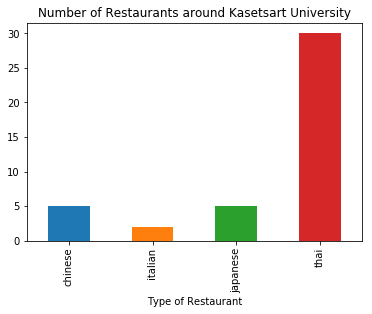

In [95]:
import matplotlib.pyplot as plt
AllnoResList.groupby('type')['name'].count().plot(kind = 'bar')
plt.title('Number of Restaurants around Kasetsart University')
plt.xlabel('Type of Restaurant')
plt.show()

##### From result  we can see Thai restaurant  they are many  around Kasetsart university  , so I think it's not good idea if you open thai restaurant

##### I dicide to look  for new opertunity in italian , chinese , japaness  

##### But  I think  factor distance  have important for   Opportunity to open new restaurant.

###  Average distance each restaurant

In [96]:
avgDistance = AllnoResList.groupby('type')['distance'].mean()
avgDistance

type
chinese     319.0
italian     633.5
japanese    531.4
thai        442.5
Name: distance, dtype: float64

##### Plot graph

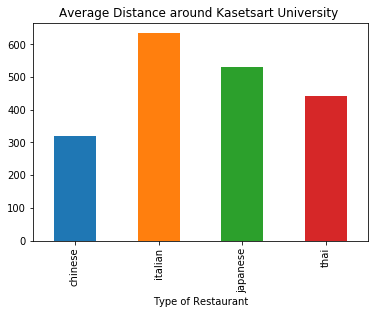

In [97]:
avgDistance.plot(kind = 'bar')
plt.title('Average Distance around Kasetsart University ')
plt.xlabel('Type of Restaurant')
plt.show()

### Conclusion

##### I see the opertinity in italian restaurant the most because it's have only 2 restaurant (Lower)  near to the  Kasetsart university .



##### And  average distance  from university have more than restaurant  any restaurant (Chinese , japan, thai ) 